# PCA (Principal Component Analysis)

**IMPORT LIBRARIES**

In [77]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

**LOADING DATASET**

In [78]:
data = pd.read_csv('vehicle_data.csv')
data.head()

,Type,Manufacturer,Model,Year,Color,Horsepower,Fuel_Type,Mileage,Price,Weight,...,Height (m),Fuel_Efficiency (km/l),Number_of_Doors,Seating_Capacity,Max_Speed (km/h),Acceleration (0-100 km/h),Engine_Displacement (cc),Safety_Rating,Infotainment_System,Interest
0,Truck,Ford,Civic,1991,Red,313.197822,Diesel,14.116445,75082.49988,3945.321832,...,1.625475,29.075846,5,12,201.299397,8.960149,1617.844000,4.733258,Advanced,6.635196
1,Motorcycle,Toyota,X5,1993,Silver,353.914427,Gasoline,14.227989,69283.34802,4520.914547,...,1.729760,17.453719,4,12,157.702499,8.279956,4063.539234,4.034559,Standard,5.527563
2,Bus,Ford,Camry,2008,Black,203.726316,Diesel,12.450292,65260.45194,4375.374672,...,1.764894,12.022325,2,5,268.394164,7.411610,1626.474930,3.143818,Basic,9.358534
3,Truck,BMW,Civic,2004,Red,271.670172,Diesel,8.442322,41307.88173,2961.585981,...,1.555781,21.305136,5,12,136.711822,6.141604,3841.203298,1.795054,Basic,4.275407
4,Truck,Honda,Camry,1995,Black,74.364984,Electric,11.814102,16540.18848,1618.106395,...,1.895537,12.463086,5,12,148.965613,7.973378,2228.796299,2.686838,Standard,4.809529


**ONE-HOT ENCODING and SEPARATING X AND Y**

In [79]:
categorical_cols = ['Type', 'Manufacturer', 'Model', 'Color', 'Fuel_Type', 'Infotainment_System']
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(data[categorical_cols])
encoded_cols = encoder.get_feature_names_out(input_features=categorical_cols)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_cols, index=data.index)
X_final = pd.concat([X_encoded_df, data.drop(categorical_cols, axis=1)], axis=1)
X = X_final.drop('Interest', axis=1)
Y = X_final['Interest']

In [80]:
data = pd.concat([X_final], axis=1)
data

,Type_Bicycle,Type_Bus,Type_Car,Type_Motorcycle,Type_Truck,Manufacturer_BMW,Manufacturer_Chevrolet,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Toyota,...,Width (m),Height (m),Fuel_Efficiency (km/l),Number_of_Doors,Seating_Capacity,Max_Speed (km/h),Acceleration (0-100 km/h),Engine_Displacement (cc),Safety_Rating,Interest
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2.016581,1.625475,29.075846,5,12,201.299397,8.960149,1617.844000,4.733258,6.635196
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.734891,1.729760,17.453719,4,12,157.702499,8.279956,4063.539234,4.034559,5.527563
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.103787,1.764894,12.022325,2,5,268.394164,7.411610,1626.474930,3.143818,9.358534
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.805454,1.555781,21.305136,5,12,136.711822,6.141604,3841.203298,1.795054,4.275407
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.594608,1.895537,12.463086,5,12,148.965613,7.973378,2228.796299,2.686838,4.809529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.112019,1.575570,28.277328,2,7,162.391038,9.653668,3499.906971,1.957660,5.839060
96,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.723138,1.219220,22.230869,4,9,141.560352,5.364924,2037.008107,1.947891,2.628240
97,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.518523,1.707183,10.894142,5,2,177.697239,7.534507,1029.057327,2.328232,9.773600
98,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.059550,1.293808,19.781640,4,5,197.752870,5.458530,4493.056763,2.580465,2.147257


**STANDARDIZING THE FEATURES**

In [81]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

**CREATING PCA OBJECT and MODEL FIT**

In [82]:
pca = PCA(n_components=15)
pca.fit(X_standardized)

PCA(n_components=15)

**EXPLAINED VARIANCE**

In [83]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.06884012 0.06542553 0.0552108  0.05291655 0.05057924 0.04720102
 0.04499546 0.04324454 0.04212718 0.03831611 0.03630117 0.03475048
 0.03179417 0.0294197  0.02867458]


**TRANSFORMING DATA TO REQUIRED COMPONENTS**

In [84]:
n_components_to_retain = 5
X_reduced = pca.transform(X_standardized)[:, :n_components_to_retain]

**PLOT**

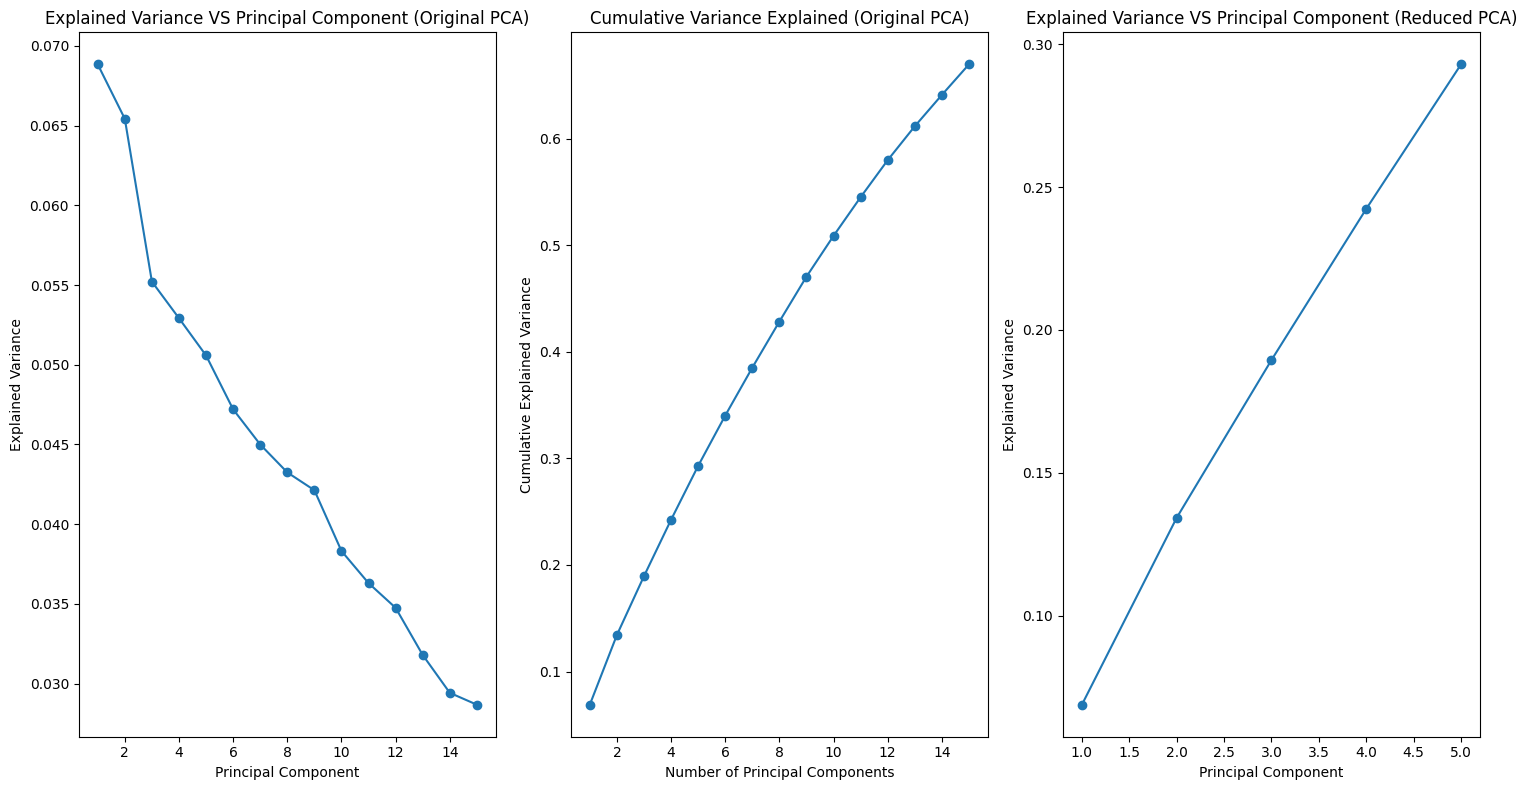

In [85]:
plt.figure(figsize=(15, 8))
# Explained variance for all 15 components
plt.subplot(1, 3, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance VS Principal Component (Original PCA)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

# Cumulative explained variance for all 15 components
cumulative_variance = np.cumsum(explained_variance)
plt.subplot(1, 3, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained (Original PCA)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

# Explained variance for the retained 5 components
plt.subplot(1, 3, 3)
explained_variance_reduced = np.cumsum(explained_variance)[:n_components_to_retain]
plt.plot(range(1, n_components_to_retain + 1), explained_variance_reduced, marker='o')
plt.title('Explained Variance VS Principal Component (Reduced PCA)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

plt.tight_layout()
plt.show()

**TRAIN AND TEST DATA SPLIT**

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)

**Random Forest Regressor**

In [87]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

#Predicting on the test set
y_pred_test = rf_regressor.predict(X_test)

**MEAN SQUARED ERROR 
CALCULATION AND PLOT**

MSE with the reduced features: 7.890413741301527


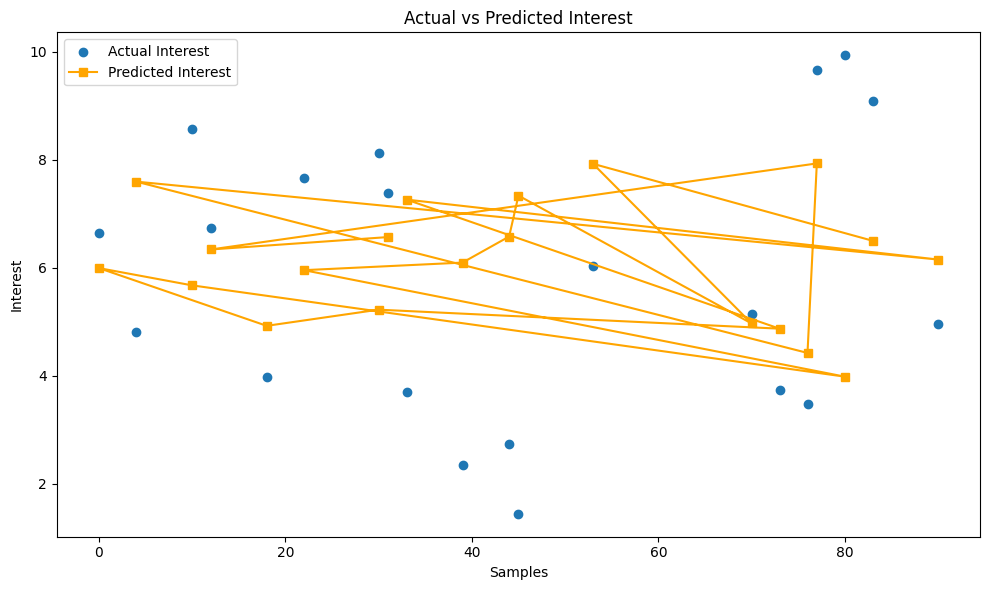

In [88]:
mse = mean_squared_error(y_test, y_pred_test)
print("MSE with the reduced features:", mse)

comparison = pd.DataFrame({'Actual Interest': y_test, 'Predicted Interest': y_pred_test})

# Plot
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Interest")
plt.scatter(comparison.index, comparison['Actual Interest'], label='Actual Interest', marker='o')
plt.plot(comparison.index, comparison['Predicted Interest'], label='Predicted Interest', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Interest")
plt.legend()
plt.tight_layout()
plt.show()
